# PA KELOMPOK 3 KECERDASAN BUATAN

### NAMA ANGGOTA KELOMPOK : 
### - Hadie Pratama Tulili
### - Rafi Izdihar
### - Muhammad Firdaus

## Table Of Contents

1. [Tujuan Dibuatnya Program](#1.-Tujuan-Dibuatnya-Program)
2. [Library yang digunakan](#2.-Library-yang-digunakan)
3. [Directory List](#3.-Directory-List)
4. [Preprocessing](#4.-Preprocessing)
5. [Data Analisis dan Visualisasi](#5.-Data-Analisis-dan-Visualisasi)
6. [Modelling](#6.-Modelling)
7. [Prediksi](#7.-Prediksi)


# 1. Tujuan Dibuatnya Program

1. Untuk mengaplikasikan Convolutional Neural Networks (CNN) guna mengklasifikasikan dan memprediksi gambar anime, kartun atau manusia.

2. Untuk mengklasifikasikan suatu gambar ke salah satu dari 3 kategori : 
    **Anime, Cartoon, Human**

3. Total data yang ada didalam dataset berjumlah 8917 sampel yang terdiri dari 3 kategori. 

4. Jumlah data training yang digunakan sebesar 6241 sampel, jumlah data testing sebesar 894 sampel serta jumlah data validation sebesar 1782 sampel.

# 2. Library yang digunakan

In [104]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import splitfolders
import seaborn as sns
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from pathlib import Path
import pandas as pd

# 3. Directory List

#### Split dataset menjadi 3 bagian yaitu train, validation, dan test dengan perbadingan 70% : 20 % : 10 %

In [105]:
# Directory Utama
main_path = '../../Dataset/Image/'

### Split Folder cukup dijalankan sekali

In [106]:
# splitfolders.ratio(
#     main_path,
#     output='dataset',
#     ratio=(0.7, 0.2, 0.1)
# )

In [107]:
# Directory List
train_path = '../../Dataset/dataset/train/'
test_path = '../../Dataset/dataset/test/'
val_path = '../../Dataset/dataset/val/'

# 4. Preprocessing
### Proses Augmentasi pada Gambar
> Pada Data Train 
- Rescale
- Rotation
- Scaling 
- Zoom in / Zoom out 
- fillm_mode
- Horizontal Flip
- Vertical Flip
> Pada Data Validation dan Testing
- Rescale
---
### Membagi direktori utama(main_path) menjadi 3 dengan variabel **train_set**, **val_set** dan **test_set**
> Pada Data Training, Validaiton dan Testing

- Mengubah resolusi gambar menjadi 128 x 128.
- Batch_size 32 yang mana dalam satu step ada 32 sampel gambar yang         dimasukkan dalam step training atau validation.


In [108]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    rotation_range=30, 
                                    shear_range=0.2, 
                                    zoom_range=(0.5,1.0), 
                                    fill_mode='nearest', 
                                    horizontal_flip=True,
                                    vertical_flip=True,)

train_set = train_datagen.flow_from_directory(train_path,
                                                batch_size=32,
                                                target_size=(128, 128),
                                                class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)

val_set = val_datagen.flow_from_directory(val_path,
                                            batch_size=32,
                                            target_size=(128, 128),
                                            class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(test_path,                                          
                                                batch_size=32,
                                                target_size=(128, 128),
                                                class_mode='categorical')

Found 6241 images belonging to 3 classes.
Found 1782 images belonging to 3 classes.
Found 894 images belonging to 3 classes.


## Membuat List Kelas Yang Ada

In [109]:
# List Nama Kelas
class_names = ['Anime', 'Cartoon', 'Human']
class_names

['Anime', 'Cartoon', 'Human']

# 5. Data Analisis dan Visualisasi

## Meta Data

In [110]:
# Dirrectory Dataset
mypath= '../../Dataset/Image/'
train= '../../Dataset/dataset/train/'
test= '../../Dataset/dataset/test/'
validation= '../../Dataset/dataset/val/'

In [111]:
# List untuk mengisi nama kelas dan jumlah data dari masing2 label
file_name = []
tag = []
TR = []
TS = []
VL = []
full_path = []

for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)
        
print("Nama Dataset      : Anime-VS-Cartoon-VS-Human-Dataset")
print("Ukuran Gambar     : [128, 128, 3]")
print("Kelas             :",class_names)
print("Total Data        : ",Total)
print("====================================")
print("Jumlah Gambar     :")
df = pd.DataFrame({"path":full_path,'file_name':file_name,"Nama":tag})
df.groupby(['Nama']).size()

Nama Dataset      : Anime-VS-Cartoon-VS-Human-Dataset
Ukuran Gambar     : [128, 128, 3]
Kelas             : ['Anime', 'Cartoon', 'Human']
Total Data        :  8917
Jumlah Gambar     :


Nama
anime      3004
cartoon    2913
human      3000
dtype: int64

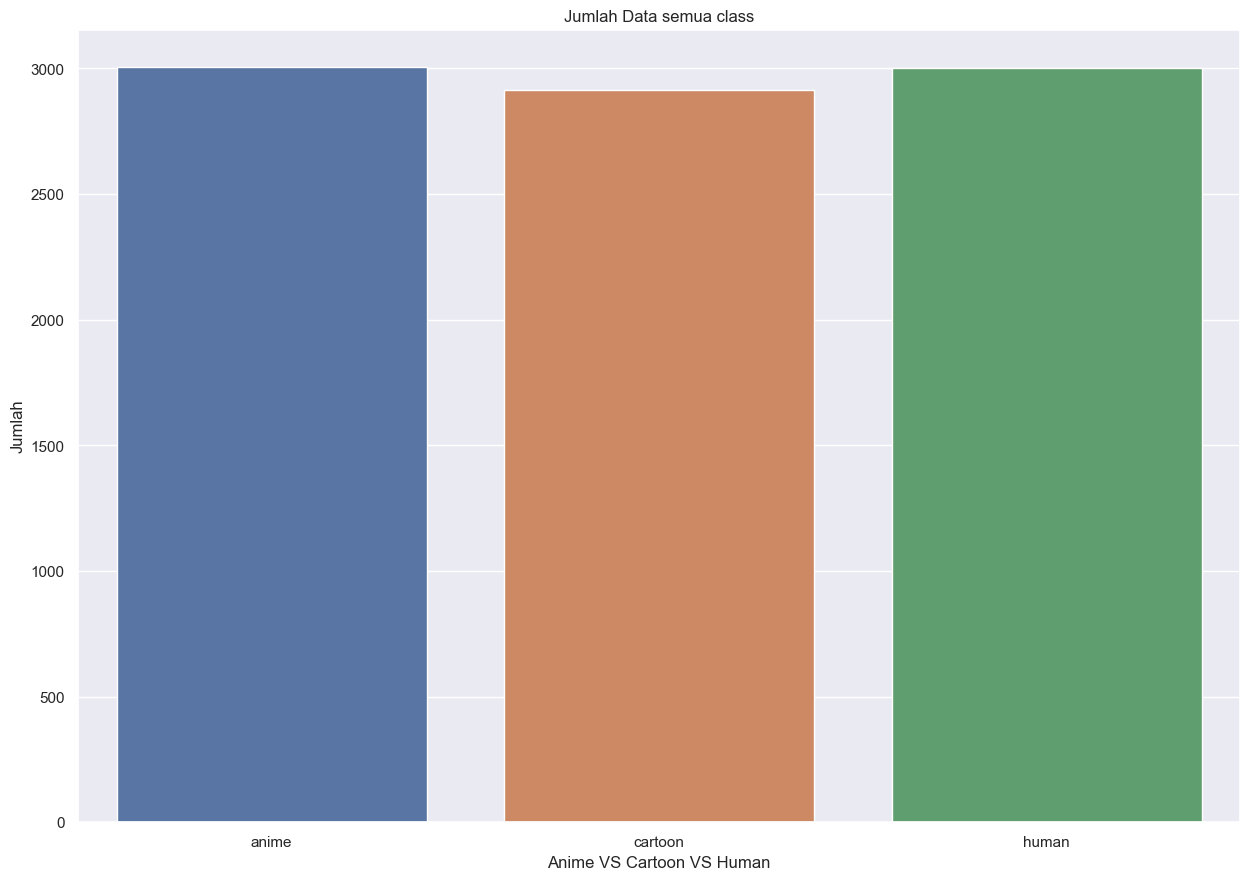

In [112]:
plt.figure(figsize=(15, 35))

sns.set_theme()

plt.subplot(3, 1, 1)
sns.countplot(x=tag)
plt.xlabel('Anime VS Cartoon VS Human')
plt.ylabel('Jumlah')
plt.title('Jumlah Data semua class')

plt.show()

In [113]:
file_name = []
TR = []
full_path = []

for path, subdirs, files in os.walk(train):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        TR.append(path.split('/')[-1])        
        file_name.append(name)
        
df = pd.DataFrame({"path":full_path,'file_name':file_name,"Train":TR})
df.groupby(['Train']).size()

Train
anime      2102
cartoon    2039
human      2100
dtype: int64

In [114]:
file_name = []
TS = []
full_path = []

for path, subdirs, files in os.walk(test):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        TS.append(path.split('/')[-1])        
        file_name.append(name)
        
df = pd.DataFrame({"path":full_path,'file_name':file_name,"Test":TS})
df.groupby(['Test']).size()

Test
anime      302
cartoon    292
human      300
dtype: int64

In [115]:
file_name = []
VL = []
full_path = []

for path, subdirs, files in os.walk(validation):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        VL.append(path.split('/')[-1])        
        file_name.append(name)
        
df = pd.DataFrame({"path":full_path,'file_name':file_name,"Validation":VL})
df.groupby(['Validation']).size()

Validation
anime      600
cartoon    582
human      600
dtype: int64

## Visualisasi

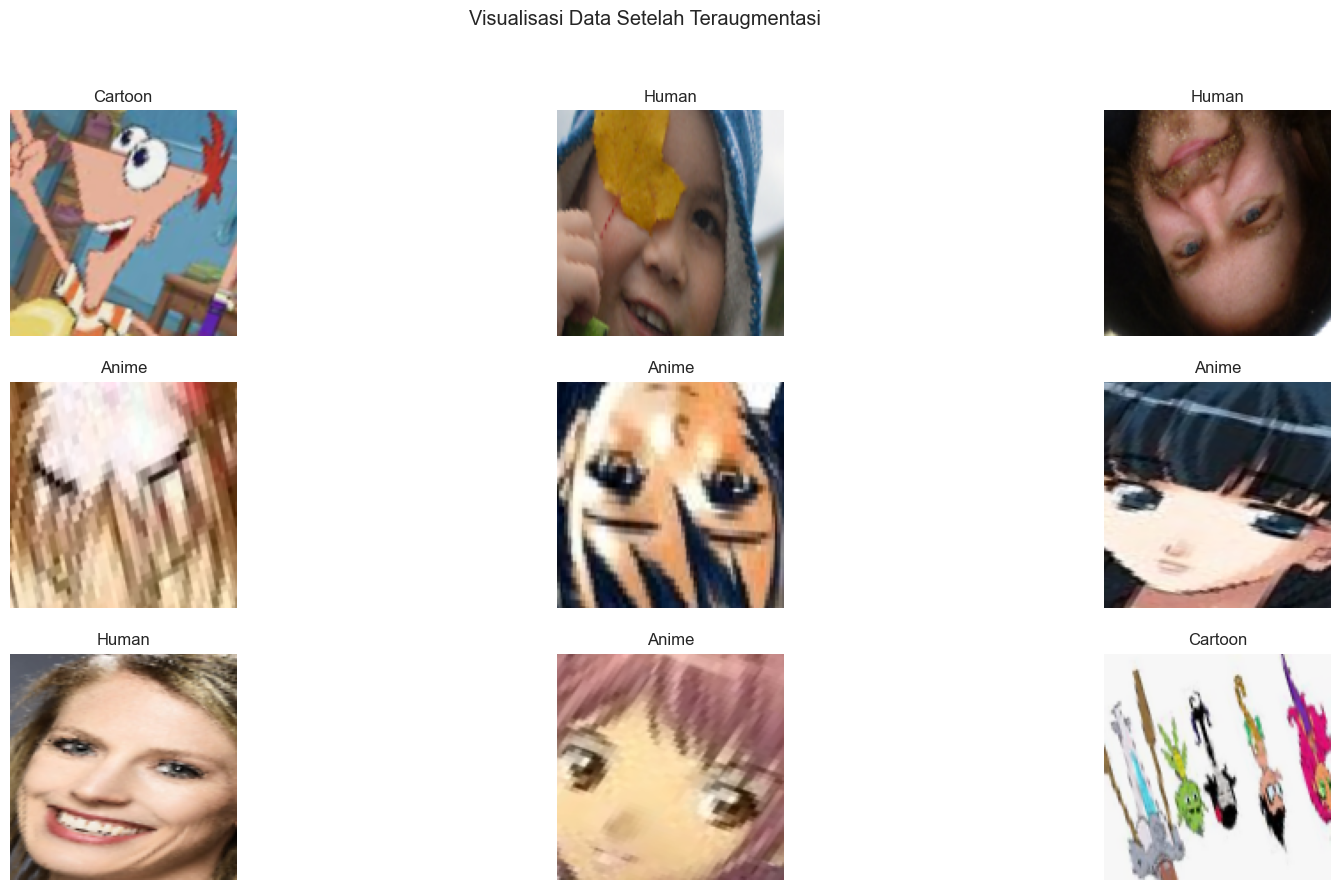

In [116]:
# Visualisasi Data setelah teraugmentasi

plt.figure(figsize=(20, 10))
plt.suptitle('Visualisasi Data Setelah Teraugmentasi')
images, labels = train_set.next()

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[tf.argmax(labels[i])])
    plt.axis("off")
    
plt.show()

Ukuran gambar : (128, 128, 3)


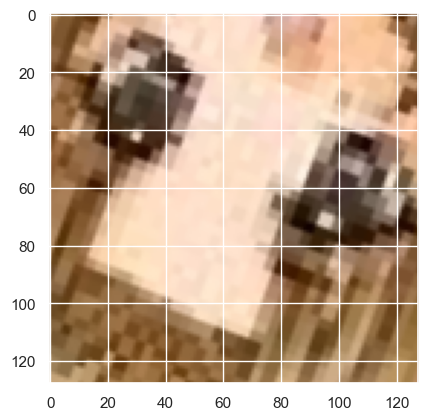

Ukuran gambar : (128, 128, 3)


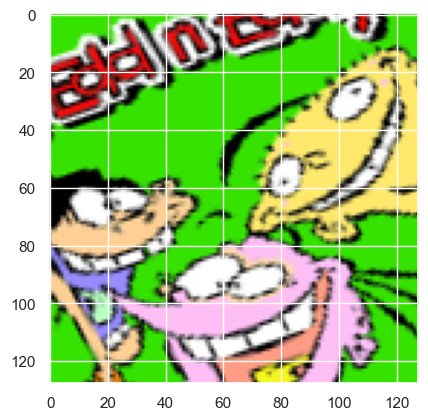

Ukuran gambar : (128, 128, 3)


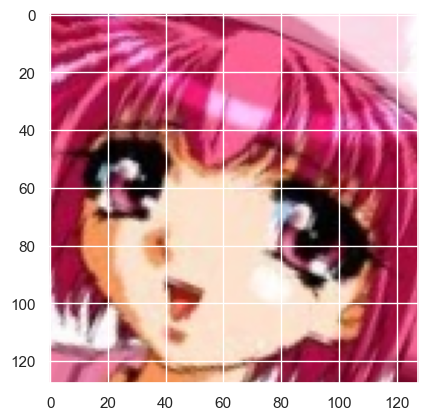

Ukuran gambar : (128, 128, 3)


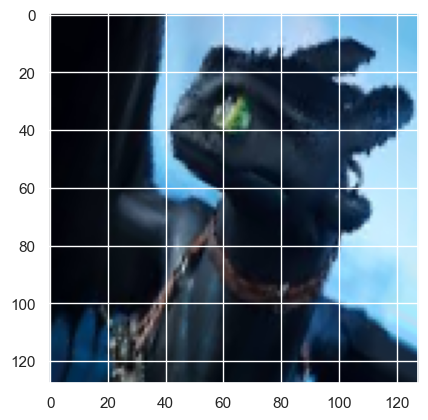

In [117]:
# Visualisasi Data Dengan Melihat Ukuran Gambarnya

for i in range(4):
    img, label = train_set.next()
    print("Ukuran gambar :",img[i].shape)
    plt.imshow(img[i])
    plt.show()


### Mengkonversi Dataset menjadi DataFrame
#### untuk visualisasi grafik Pie

In [118]:
paths_train = [path.parts[-2:] for path in
        Path(train_path).rglob('*.*')] #*.* agar semua format gambar bisa diambil

df_trainpath = pd.DataFrame(data=paths_train, columns=['Class', 'Image']) #membuat nama koloom utk dataframe
df_trainpath = df_trainpath.sort_values('Class', ascending=True) #sorting nama Class
df_trainpath.reset_index(drop=True, inplace=True) #sorting indeks setiap baris
df_trainpath       

,Class,Image
0,anime,1000_2000.jpg
1,anime,2793_2002.jpg
2,anime,2791_2002.jpg
3,anime,2790_2002.jpg
4,anime,278_2000.jpg
...,...,...
6236,human,00977.png
6237,human,00976.png
6238,human,00975.png
6239,human,00973.png


In [119]:
paths_test = [path.parts[-2:] for path in
        Path(test_path).rglob('*.*')] #*.* agar semua format gambar bisa diambil

df_testpath = pd.DataFrame(data=paths_test, columns=['Class', 'Image']) #membuat nama koloom utk dataframe
df_testpath = df_testpath.sort_values('Class', ascending=True) #sorting nama Class
df_testpath.reset_index(drop=True, inplace=True) #sorting indeks setiap baris
df_testpath      

,Class,Image
0,anime,0_2000.jpg
1,anime,309_2000.jpg
2,anime,3001_2002.jpg
3,anime,2996_2002.jpg
4,anime,2994_2002.jpg
...,...,...
889,human,01072.png
890,human,01053.png
891,human,01036.png
892,human,01009.png


In [120]:
paths_val = [path.parts[-2:] for path in
        Path(val_path).rglob('*.*')] #*.* agar semua format gambar bisa diambil

df_valpath = pd.DataFrame(data=paths_val, columns=['Class', 'Image']) #membuat nama koloom utk dataframe
df_valpath = df_valpath.sort_values('Class', ascending=True) #sorting nama Class
df_valpath.reset_index(drop=True, inplace=True) #sorting indeks setiap baris
df_valpath       

,Class,Image
0,anime,1005_2000.jpg
1,anime,2803_2002.jpg
2,anime,2808_2002.jpg
3,anime,2811_2002.jpg
4,anime,2830_2002.jpg
...,...,...
1777,human,01025.png
1778,human,01029.png
1779,human,01030.png
1780,human,01048.png


In [121]:
train_pie = df_trainpath['Class'].value_counts().rename_axis("Class").reset_index(name="Image")
test_pie = df_testpath['Class'].value_counts().rename_axis("Class").reset_index(name="Image")
val_pie = df_valpath['Class'].value_counts().rename_axis("Class").reset_index(name="Image")

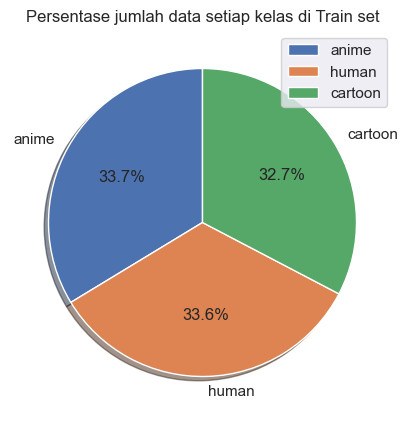

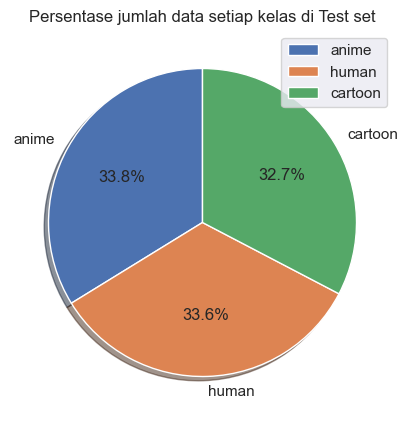

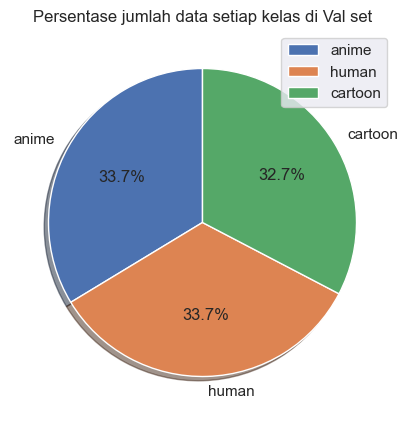

In [122]:
plt.figure(figsize=(10,5))
plt.pie(
    train_pie['Image'],
    labels=train_pie['Class'],
    startangle=90,
    autopct='%.1f%%',
    shadow=True
)
plt.title("Persentase jumlah data setiap kelas di Train set")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.pie(
    test_pie['Image'],
    labels=test_pie['Class'],
    startangle=90,
    autopct='%.1f%%',
    shadow=True
)
plt.title("Persentase jumlah data setiap kelas di Test set")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.pie(
    val_pie['Image'],
    labels=val_pie['Class'],
    startangle=90,
    autopct='%.1f%%',
    shadow=True
)
plt.title("Persentase jumlah data setiap kelas di Val set")
plt.legend()
plt.show()

#### Jumlah Data setiap kelas dalam **Training**, **Testing** dan **Validation**

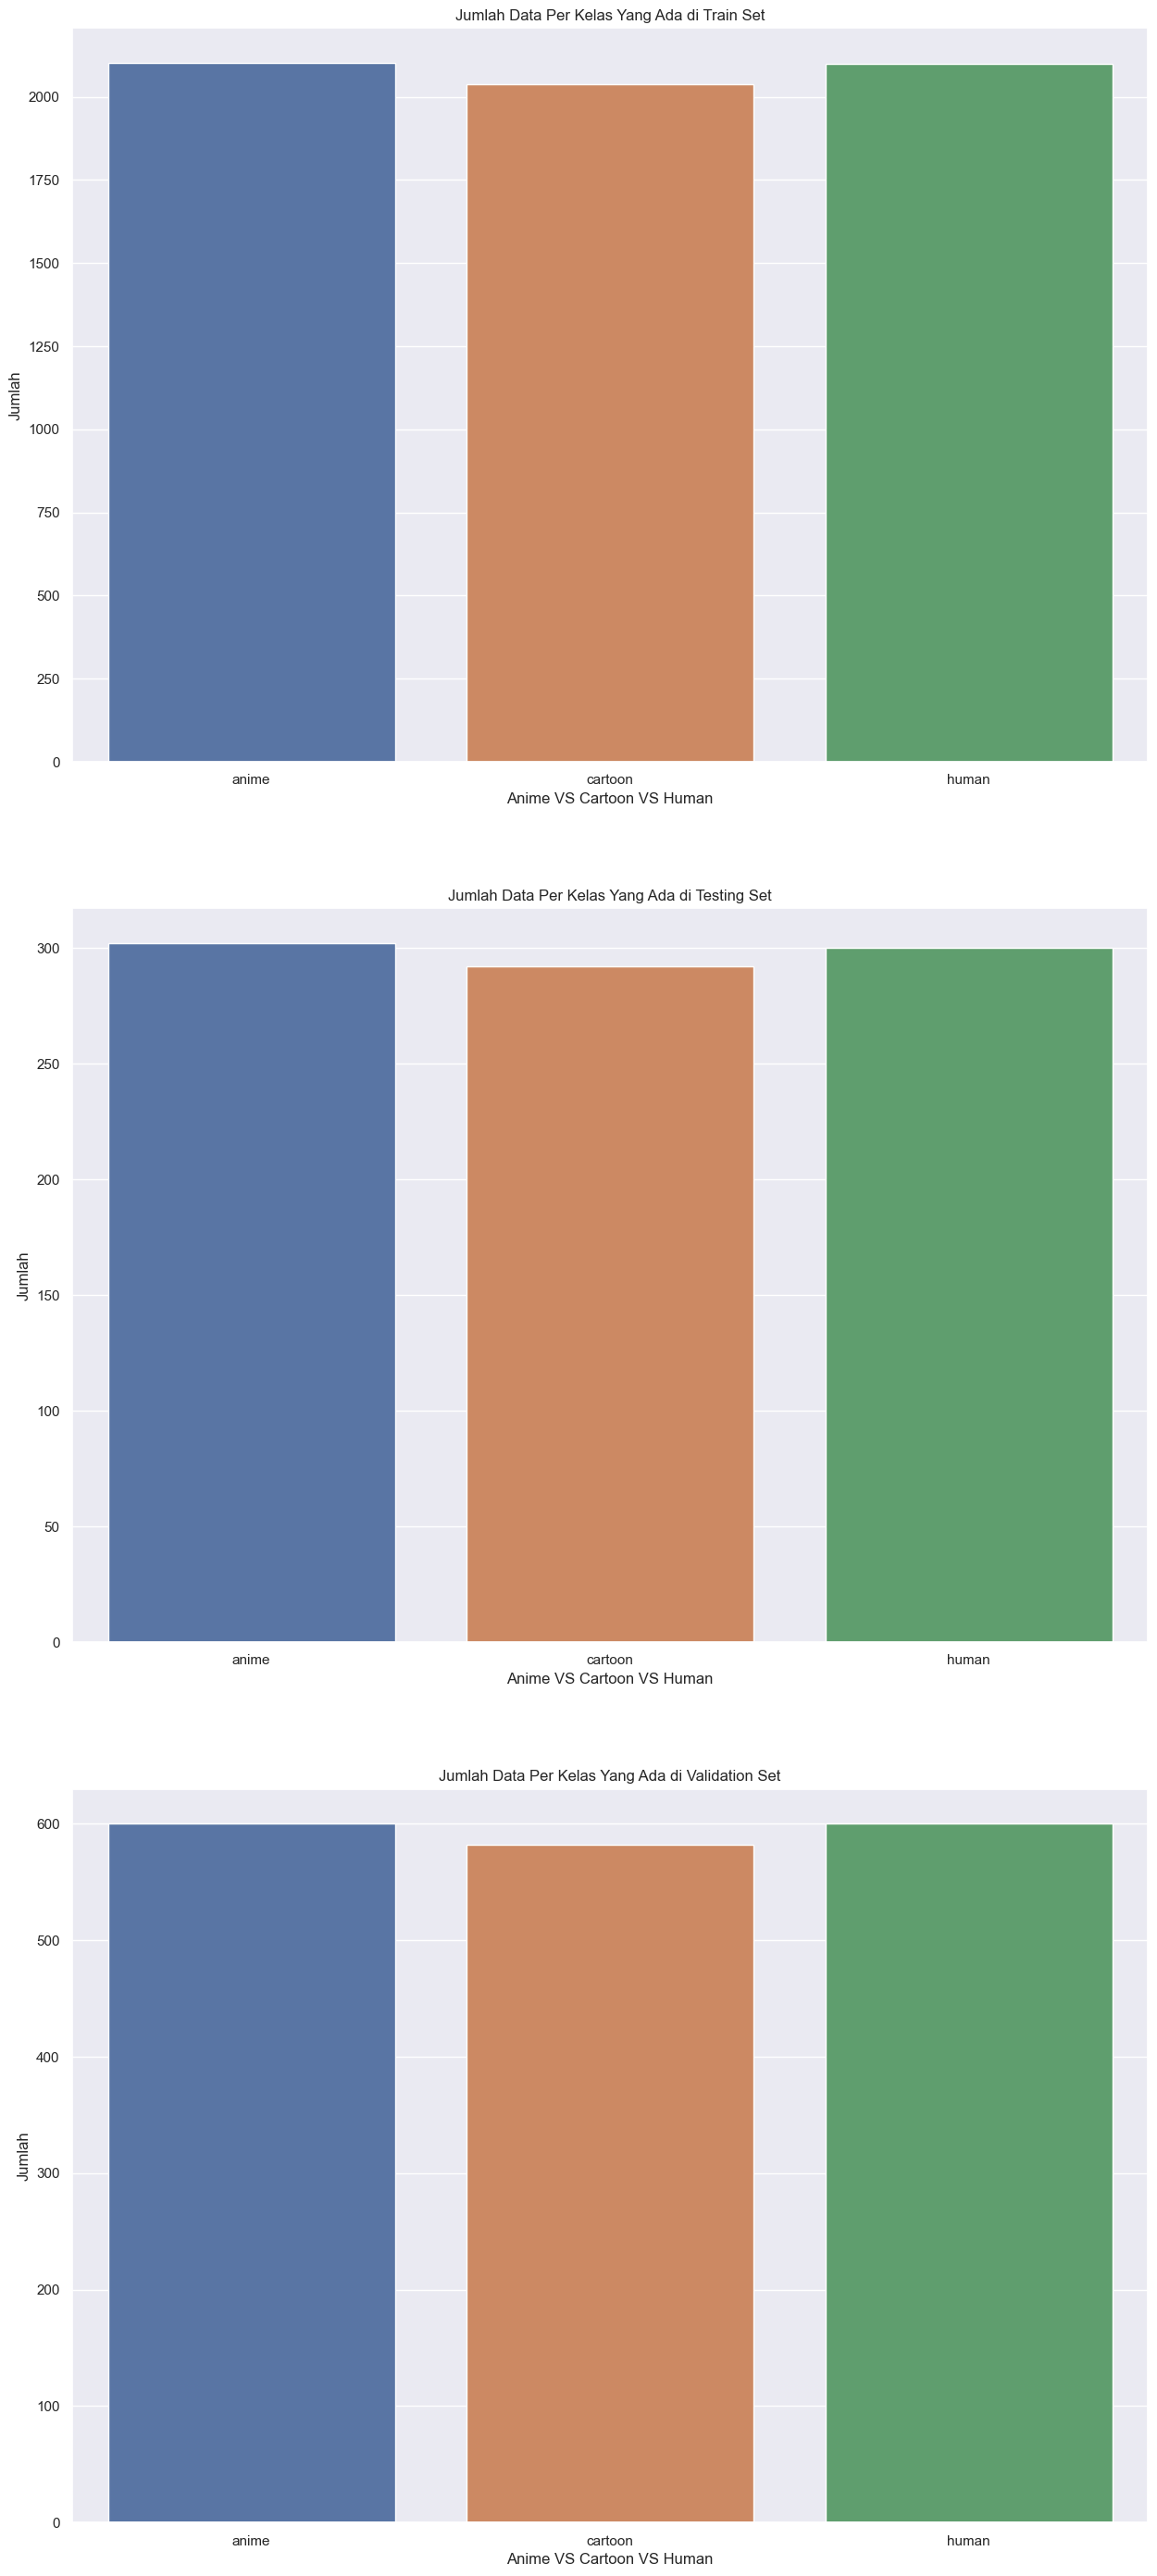

In [123]:
# Diagram bar untuk masing2 datasplit

plt.figure(figsize=(15, 35))

sns.set_theme()

plt.subplot(3, 1, 1)
sns.countplot(x=TR)
plt.xlabel('Anime VS Cartoon VS Human')
plt.ylabel('Jumlah')
plt.title('Jumlah Data Per Kelas Yang Ada di Train Set')

plt.subplot(3, 1, 2)
sns.countplot(x=TS)
plt.xlabel('Anime VS Cartoon VS Human')
plt.ylabel('Jumlah')
plt.title('Jumlah Data Per Kelas Yang Ada di Testing Set')

plt.subplot(3, 1, 3)
sns.countplot(x=VL)
plt.xlabel('Anime VS Cartoon VS Human')
plt.ylabel('Jumlah')
plt.title('Jumlah Data Per Kelas Yang Ada di Validation Set')

plt.show()

# 6. Modelling
> Modelling dengan beberapa layer
1. Input layer
    - Convolution filter sebanyak 64, input shape 128x128 3 karena rgb, fungsi aktivasi relu
    - Pooling dengan matrix 2x2

2. Hidden Layer
    - Pooling sebanyak 2 dengan matrix 2x2
    - Convolution filter 16 dan 32 dengan matrix 3x3 dengan aktivasi relu
    - Layer Dropout 0.5
    - Layer Flatten

3. Output Layer    
    - Layer Dense sebanyak 3 filter dan aktivasi softmax

In [124]:
model = tf.keras.Sequential([

#Input layer
tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=[128, 128, 3]),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),

#Hidden layer
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
tf.keras.layers.Flatten(),
    
#Output layer
tf.keras.layers.Dense(3, activation='softmax')
])

In [125]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 16)       

#### Compile model untuk mengatur konfigurasi model
- loss menggunakan metode Categorical Crossentropy
- Optimizer menggunakan metode Adam
- Kriteria berdasarkan akurasi

In [126]:
model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=['accuracy'])

In [127]:

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.97 and logs.get('val_accuracy') > 0.95):
            self.model.stop_training = True


#### Proses melatih data dari model yang dibuat diatas
- Dengan iterasi sebanyak 20
- Mengambil data validation

In [128]:
hasil = model.fit(train_set, epochs=20, validation_data=val_set, verbose=1, callbacks=[myCallback()])

Epoch 1/20
196/196 [==============================] - 248s 1s/step - loss: 0.4971 - accuracy: 0.7835 - val_loss: 0.5447 - val_accuracy: 0.7946
Epoch 2/20
196/196 [==============================] - 253s 1s/step - loss: 0.2552 - accuracy: 0.9063 - val_loss: 0.2437 - val_accuracy: 0.9153
Epoch 3/20
196/196 [==============================] - 253s 1s/step - loss: 0.1927 - accuracy: 0.9332 - val_loss: 0.1928 - val_accuracy: 0.9349
Epoch 4/20
196/196 [==============================] - 252s 1s/step - loss: 0.1683 - accuracy: 0.9394 - val_loss: 0.1677 - val_accuracy: 0.9456
Epoch 5/20
196/196 [==============================] - 252s 1s/step - loss: 0.1767 - accuracy: 0.9394 - val_loss: 0.1757 - val_accuracy: 0.9433
Epoch 6/20
196/196 [==============================] - 250s 1s/step - loss: 0.1361 - accuracy: 0.9516 - val_loss: 0.1569 - val_accuracy: 0.9444
Epoch 7/20
196/196 [==============================] - 252s 1s/step - loss: 0.1389 - accuracy: 0.9511 - val_loss: 0.1530 - val_accuracy: 0.9506

## Evaluasi
#### untuk menguji Hasil dari validation menggunakan evaluate

In [129]:
# Evaluasi Data Testing

test_evaluate = model.evaluate(test_set, verbose=0)
print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {test_evaluate[1]}')

Test loss     : 0.0797261893749237
Test accuracy : 0.9720357656478882


### Visualisasi perbandingan **Akurasi** dan **Loss** Model


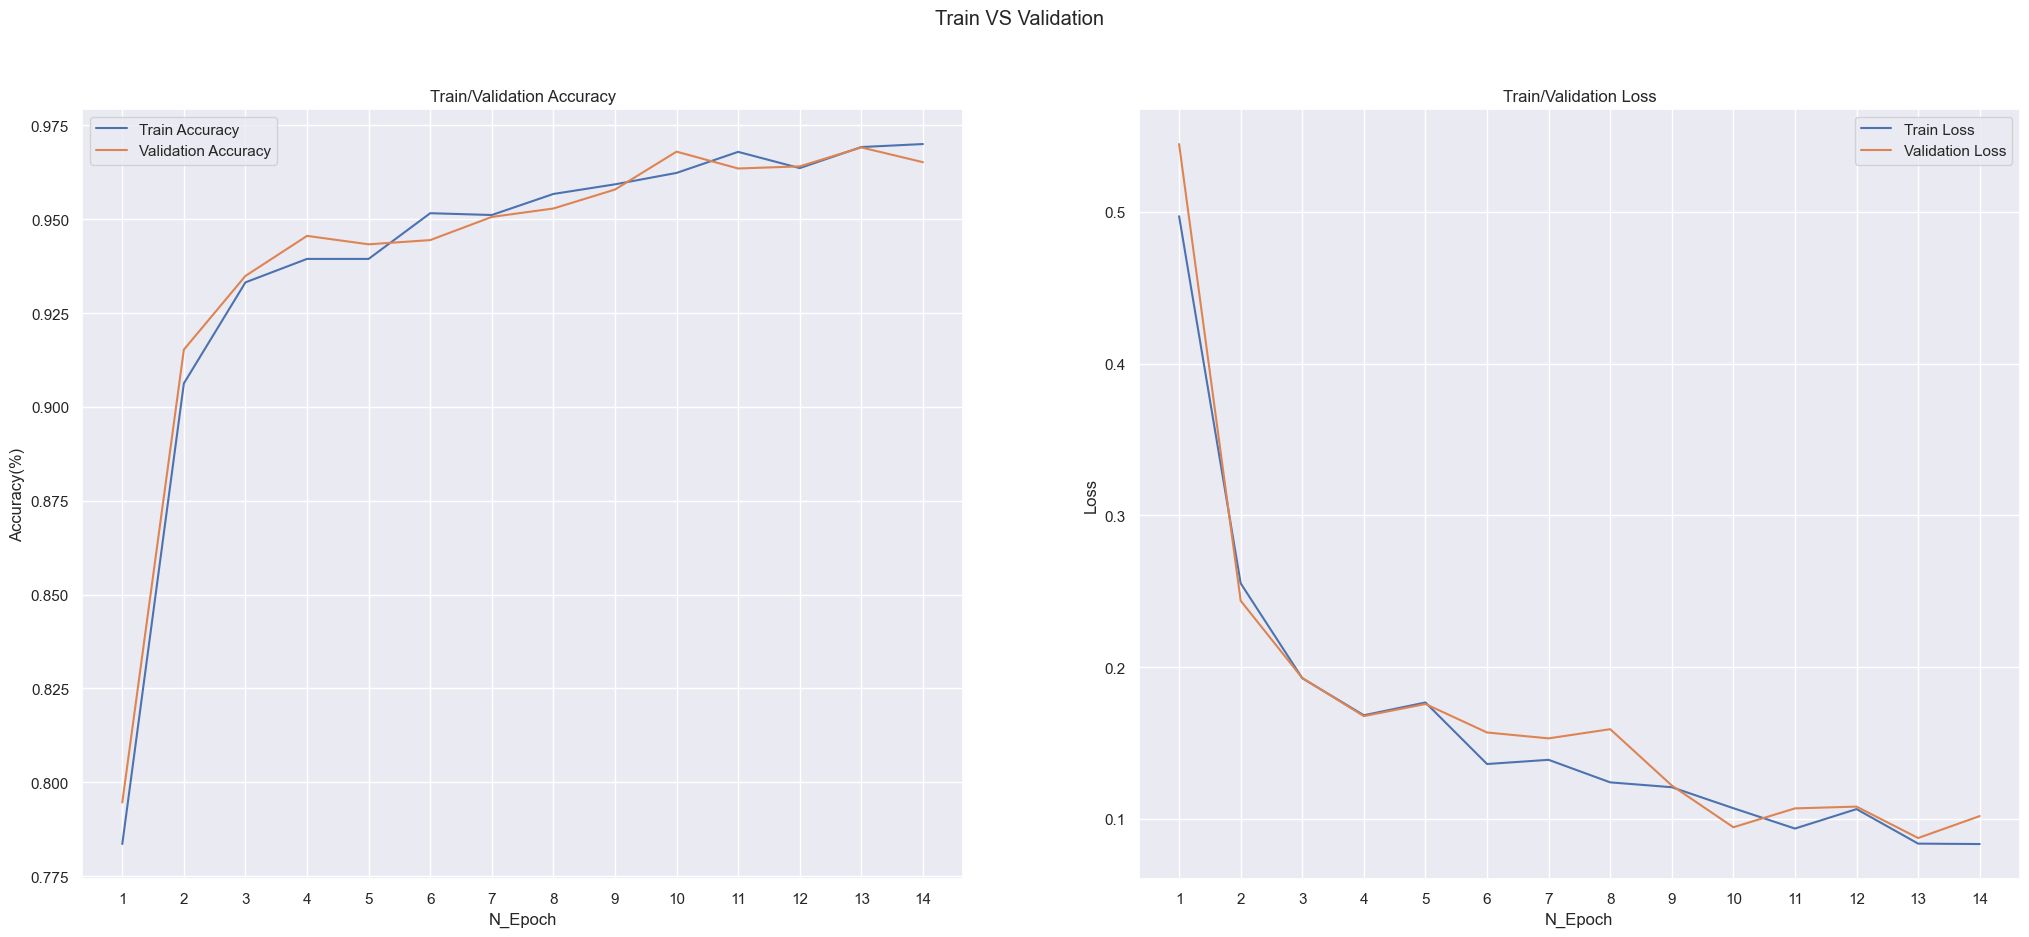

In [131]:
# Visualisasi akurasi dan loss dari fitting

epoch = [i+1 for i in range(14)]


plt.figure(figsize=(25, 10))
plt.suptitle('Train VS Validation')

#Subplot Akurasi
plt.subplot(1,2,1)
sns.lineplot(x=epoch,y = hasil.history['accuracy'],label ='Train Accuracy')
sns.lineplot(x=epoch,y = hasil.history['val_accuracy'],label ='Validation Accuracy')

plt.xticks(epoch)
plt.ylabel('Accuracy(%)')
plt.xlabel('N_Epoch')
plt.title("Train/Validation Accuracy")

#Subplot Loss
plt.subplot(1,2,2)
sns.lineplot(x=epoch,y = hasil.history['loss'],label ='Train Loss')
sns.lineplot(x=epoch,y = hasil.history['val_loss'],label ='Validation Loss')

plt.xticks(epoch)
plt.title("Train/Validation Loss")
plt.xlabel('N_Epoch')
plt.ylabel('Loss')
plt.show()

In [132]:
# Save Model

model.save('Model Saved')

INFO:tensorflow:Assets written to: Model Saved\assets


INFO:tensorflow:Assets written to: Model Saved\assets


# 7. Prediksi
### Visualisai Hasil prediksi yang benar

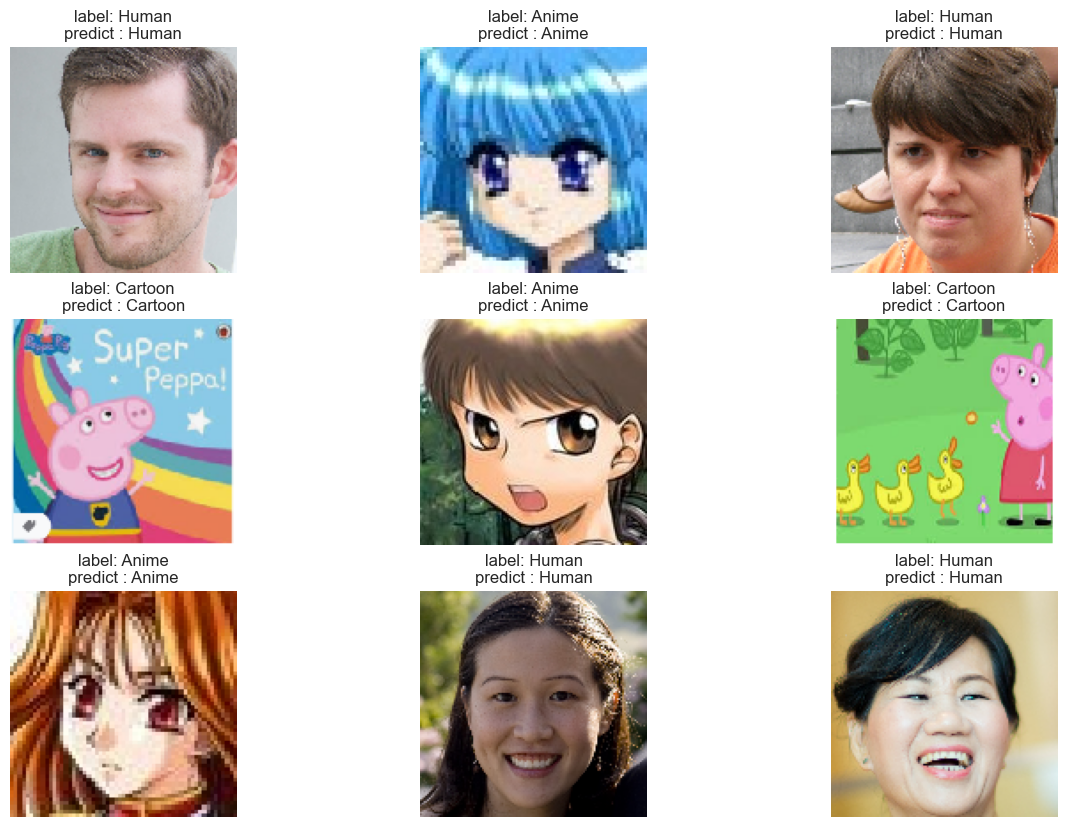

In [133]:
#Plot prediction

image ,label = next(iter(test_set))

plt.figure(figsize=(15,10))
for i in range(9) :
    TrueLabel = class_names[np.argmax(label[i])]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'label: {TrueLabel}\npredict : {class_names[y_pred]}')

### Visualisasi Hasil prediksi yang salah

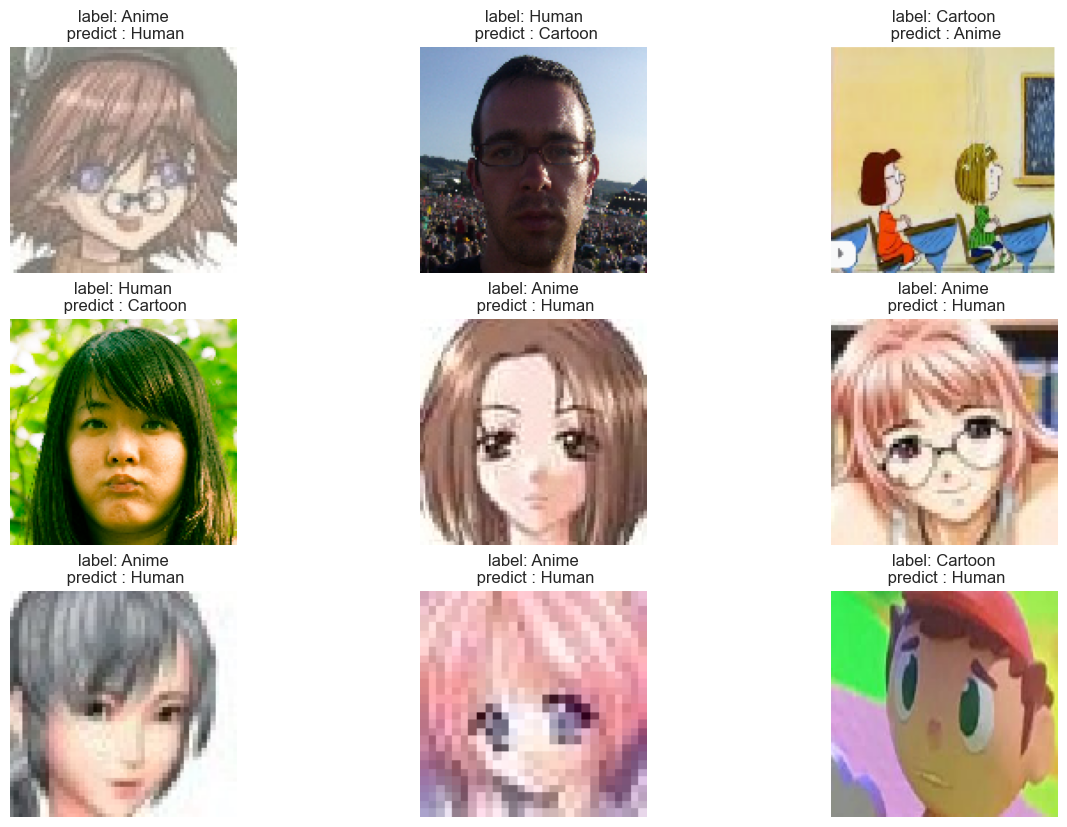

In [134]:
#Plot prediction Error
plt.figure(figsize=(15,10))

Trulabel = []
img = []
pred = []
for i in range(len(test_set)) :
    image,label = test_set.next()
    for j in range(32) :
        if (len(Trulabel) == 9) :
            break
        Aktual = class_names[np.argmax(label[j])]
        y_pred = np.argmax(model.predict(image[j][None,...],verbose=0))
        if (Aktual != class_names[y_pred]) :
            Trulabel.append(Aktual)
            img.append(image[j])
            pred.append(y_pred)

for k in range(9) :
    plt.subplot(3,3,k+1)
    plt.imshow(tf.squeeze(img[k]))
    plt.axis('off')
    plt.title(f'label: {Trulabel[k]}\n predict : {class_names[pred[k]]}')


In [135]:
# Untuk menyimpan hasil testing dan predict dari data testing
y_test = []
y_pred = []

for i in range(len(test_set)) :
    x,y = test_set.next()
    for j in range(len(y)) :
        y_test.append(class_names[tf.argmax(y[j])])
        y_pred.append(class_names[np.argmax(model.predict(x[j][None,...],verbose=0))])

### Confusion Matrix

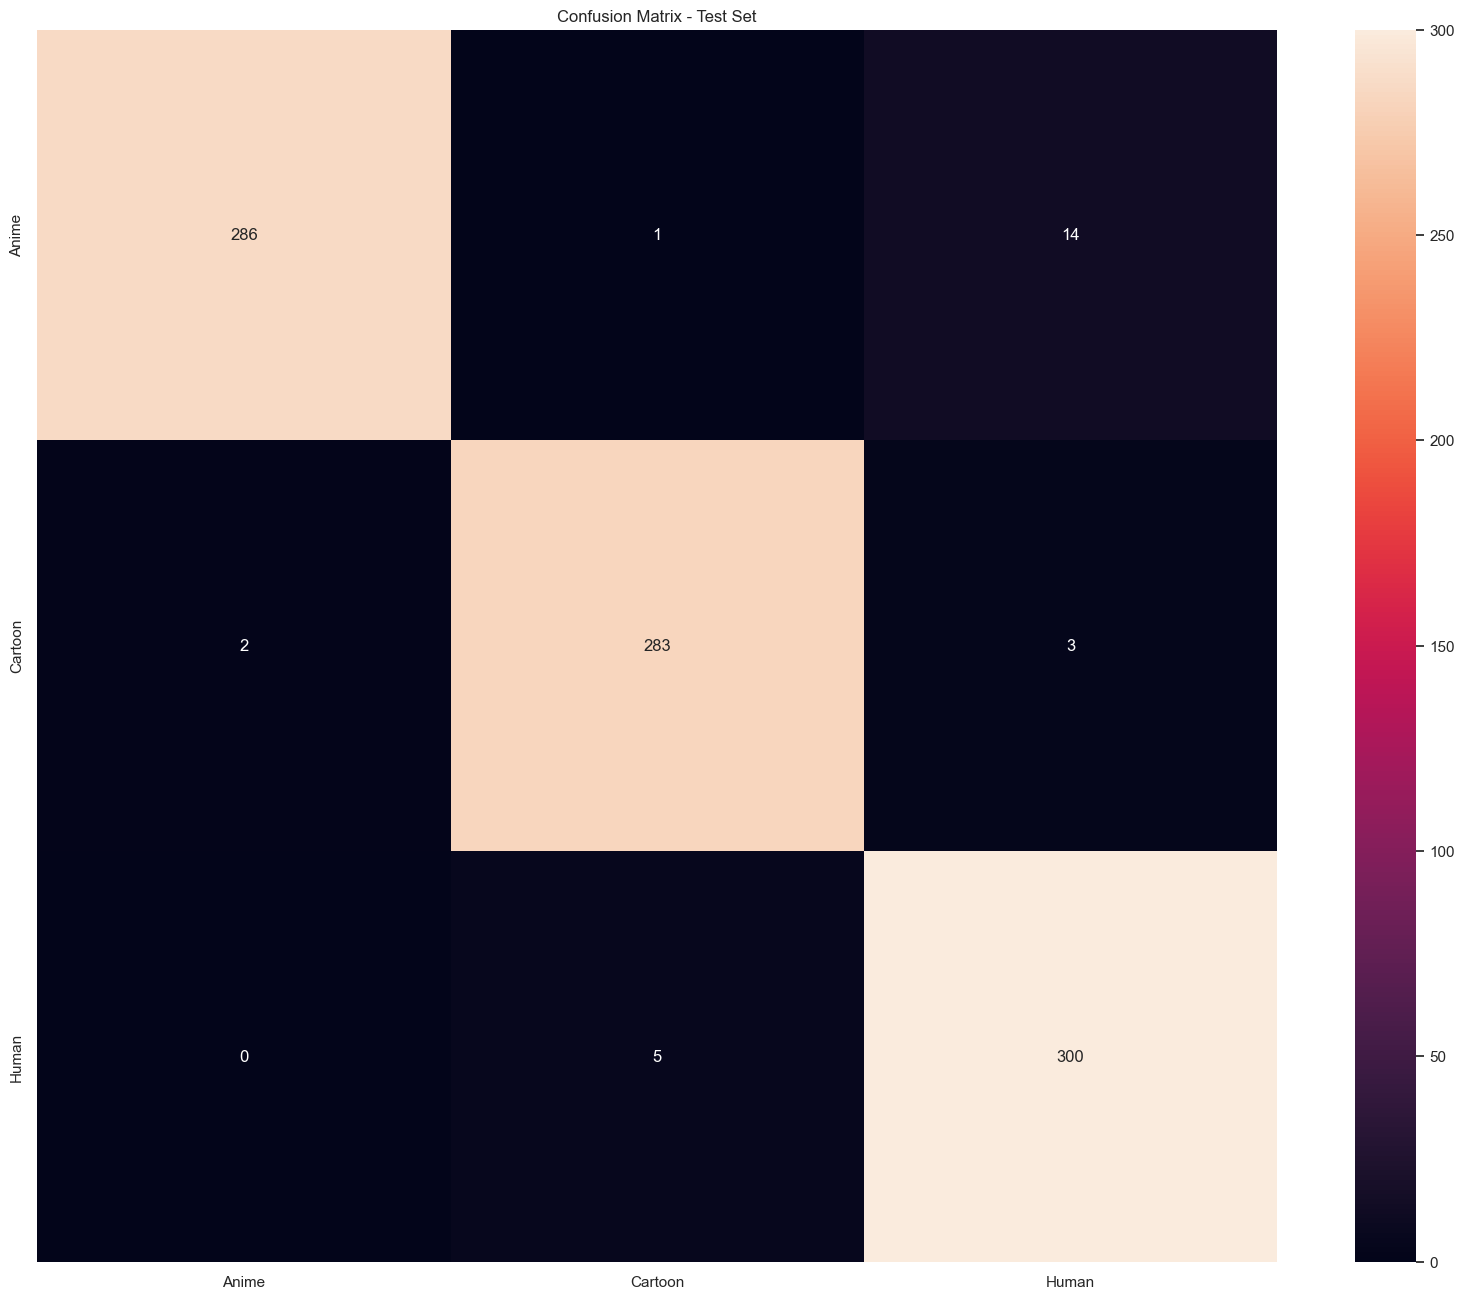

In [136]:
# Visualisasi Heatmap untuk Confusion Matrix

plt.figure(figsize=(20, 16))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_names,yticklabels=class_names)
plt.title("Confusion Matrix - Test Set")
plt.show()

### Classification Report

In [137]:
#Classification Report

print('Classification Report')
print(classification_report(y_test, y_pred, target_names=class_names))

Classification Report
              precision    recall  f1-score   support

       Anime       0.99      0.95      0.97       301
     Cartoon       0.98      0.98      0.98       288
       Human       0.95      0.98      0.96       305

    accuracy                           0.97       894
   macro avg       0.97      0.97      0.97       894
weighted avg       0.97      0.97      0.97       894

